<a href="https://colab.research.google.com/github/anwesha0506/Data-Analysis-Portfolio/blob/main/WALMART_SALES_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WALMART SALES ANALYSIS:**

We have been given a data set to analyse and answer the some questions based on analysis.

**Data Set: Walmart Sales.**

*We use Python to perform the required analysis.*


In [ ]:
from google.colab import files
 uploaded = files.upload()

Saving Walmart_Sales_CB1799BACC_77EAC63B5D.csv to Walmart_Sales_CB1799BACC_77EAC63B5D.csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Walmart_Sales_CB1799BACC_77EAC63B5D.csv']))
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      A  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      B     Yangon        Member    Male   
4    373-73-7910      C     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      A  Naypyitaw        Normal    Male   
996  303-96-2227      A   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      B     Yangon        Normal    Male   
999  849-09-3807      C     Yangon        Member  Female   

               Product line  Unit price  Quantity       Date   Time  \
0         Health and beauty       74.69         7   1/5/2019  13:08   
1    Electronic accessories       15.28         5   3/8/2019  10:29   
2        Home and lifestyle       46.33         7   3/3/2019  13:2

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,5.3,604.17


In [ ]:
# Calculate the total quantity of sales and total transactions per branch in each city
city_branch_sales = df.groupby(['City', 'Branch']).agg({
    'Quantity': 'sum',          # Sum of quantities sold
    'Invoice ID': 'nunique'      # Count of unique transactions
}).rename(columns={'Quantity': 'Total Quantity Sold', 'Invoice ID': 'Total Transactions'})

# Reset the index to display as a table
city_branch_sales = city_branch_sales.reset_index()
print(city_branch_sales)

        City Branch  Total Quantity Sold  Total Transactions
0   Mandalay      A                  637                 119
1   Mandalay      B                  664                 118
2   Mandalay      C                  519                  95
3  Naypyitaw      A                  648                 110
4  Naypyitaw      B                  604                 109
5  Naypyitaw      C                  579                 109
6     Yangon      A                  598                 114
7     Yangon      B                  631                 113
8     Yangon      C                  630                 113


In [ ]:
# Step 1: Create a 'Sales' column as Quantity * Unit price
df['Sales'] = df['Quantity'] * df['Unit price']

# Step 2: Group by 'City' and 'Branch' and calculate total sales and transaction count
city_branch_sales = df.groupby(['City', 'Branch']).agg({
    'Sales': 'sum',            # Sum of total sales for each branch in each city
    'Invoice ID': 'nunique'     # Count of unique transactions
}).rename(columns={'Sales': 'Total Sales/Revenue', 'Invoice ID': 'Transactions Count'})

# Step 3: Reset the index to make it easier to read as a table
city_branch_sales = city_branch_sales.reset_index()
print(city_branch_sales)

        City Branch  Total Sales/Revenue  Transactions Count
0   Mandalay      A             34130.09                 119
1   Mandalay      B             37215.93                 118
2   Mandalay      C             29794.62                  95
3  Naypyitaw      A             35985.64                 110
4  Naypyitaw      B             35157.75                 109
5  Naypyitaw      C             34160.14                 109
6     Yangon      A             33647.27                 114
7     Yangon      B             35193.51                 113
8     Yangon      C             32302.43                 113


In [ ]:
city_branch_sales.head(9)

,City,Branch,Total Sales/Revenue,Transactions Count
0,Mandalay,A,34130.09,119
1,Mandalay,B,37215.93,118
2,Mandalay,C,29794.62,95
3,Naypyitaw,A,35985.64,110
4,Naypyitaw,B,35157.75,109
5,Naypyitaw,C,34160.14,109
6,Yangon,A,33647.27,114
7,Yangon,B,35193.51,113
8,Yangon,C,32302.43,113


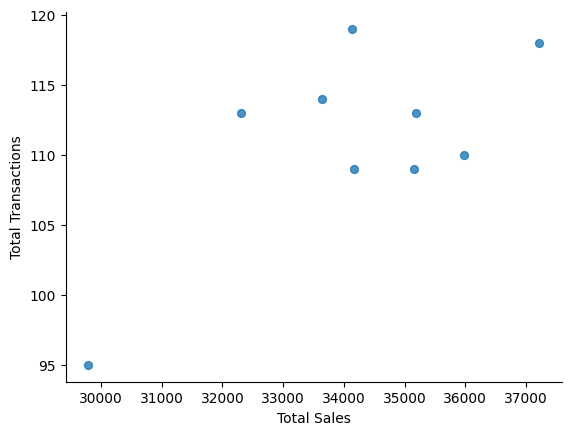

In [ ]:
# @title Total Sales vs Total Transactions

from matplotlib import pyplot as plt
city_branch_sales.plot(kind='scatter', x='Total Sales', y='Total Transactions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Analyzing  the performance of sales and revenue at the city and branch level:

In Mandalay,Branch B has the highest sales,followed by branch B and then C.
In Yangon,Branch B has the highest sales,followed by branch A and then C.
In Naypyitaw,Branch A has the highest sales,followed by branch B and then branch C.

Branches in Mandalay and Naypyitaw tend to have higher sales overall, with the highest sales observed in *Branch B of Mandalay*.

B) **CALCULATION OF THE AVERAGE PROCE OF AN ITEM SOLD AT EACH BRANCH OF THE CITY**

In [ ]:
# Group by City and Branch, then calculate the average unit price
avg_price_branch_city = df.groupby(['City', 'Branch'])['Unit price'].mean().reset_index()

# Renaming the column
avg_price_branch_city = avg_price_branch_city.rename(columns={'Unit price': 'Average Unit Price'})

# Displaying the result
print(avg_price_branch_city)

        City Branch  Average Unit Price
0   Mandalay      A           53.353866
1   Mandalay      B           56.133305
2   Mandalay      C           57.958316
3  Naypyitaw      A           54.123182
4  Naypyitaw      B           57.785688
5  Naypyitaw      C           57.941009
6     Yangon      A           55.639298
7     Yangon      B           56.011062
8     Yangon      C           52.684602


In [ ]:
avg_price_branch_city.head(9)

,City,Branch,Average Unit Price
0,Mandalay,A,53.353866
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,54.123182
4,Naypyitaw,B,57.785688
5,Naypyitaw,C,57.941009
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.684602


C) **To analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019**.


In [ ]:
# Convert 'Date' to datetime format-part of the DATA PREPARATION STEP.
df['Date'] = pd.to_datetime(df['Date'])

# Creating a 'Sales' column
df['Sales'] = df['Quantity'] * df['Unit price']

# Creating a 'YearMonth' column for monthly grouping
df['YearMonth'] = df['Date'].dt.to_period('M')

#Monthly Aggregation of Sales across Product Line, Gender, and Payment
monthly_sales = df.groupby(['YearMonth', 'Product line', 'Gender', 'Payment']).agg({'Sales': 'sum'}).reset_index()

#Filtering for records up to April 2019
monthly_sales = monthly_sales[monthly_sales['YearMonth'] <= '2019-04']

# Display the filtered monthly sales data
#print(monthly_sales)

with pd.option_context('display.max_rows', None,):
    print(monthly_sales)


    YearMonth            Product line  Gender      Payment    Sales
0     2019-01  Electronic accessories  Female         Cash  2731.86
1     2019-01  Electronic accessories  Female  Credit card  3045.42
2     2019-01  Electronic accessories  Female      Ewallet  1576.48
3     2019-01  Electronic accessories    Male         Cash  3380.29
4     2019-01  Electronic accessories    Male  Credit card  2248.65
5     2019-01  Electronic accessories    Male      Ewallet  4951.86
6     2019-01     Fashion accessories  Female         Cash  3845.24
7     2019-01     Fashion accessories  Female  Credit card  2535.52
8     2019-01     Fashion accessories  Female      Ewallet  4475.81
9     2019-01     Fashion accessories    Male         Cash  1459.32
10    2019-01     Fashion accessories    Male  Credit card  3210.61
11    2019-01     Fashion accessories    Male      Ewallet  2897.42
12    2019-01      Food and beverages  Female         Cash  5197.05
13    2019-01      Food and beverages  Female  C

In [ ]:
monthly_sales.head(108)

,YearMonth,Product line,Gender,Payment,Sales
0,2019-01,Electronic accessories,Female,Cash,2731.86
1,2019-01,Electronic accessories,Female,Credit card,3045.42
2,2019-01,Electronic accessories,Female,Ewallet,1576.48
3,2019-01,Electronic accessories,Male,Cash,3380.29
4,2019-01,Electronic accessories,Male,Credit card,2248.65
...,...,...,...,...,...
103,2019-03,Sports and travel,Female,Credit card,2863.86
104,2019-03,Sports and travel,Female,Ewallet,3398.57
105,2019-03,Sports and travel,Male,Cash,2084.19
106,2019-03,Sports and travel,Male,Credit card,3633.90


**Analysis and Focus Areas**

Now that we have the aggregated data, we can explore the focus areas based on April 2019 data.

**Product line**: To identify product lines with low sales in April and consider promotions or targeted marketing,also some advertising campaigns for a particular product line,for example-Fashion,Health and Lifestyle can include catchy taglines like *MAZBOOT RAHEIN,SWASTH RAHEIN* around the product section can draw attention of both males and females.

**Gender**: For a particular month sales are low for the male as well as the female gender. The numbers are low for one gender segment, we need to consider gender-specific marketing strategies.
Say,Product Design-
products may be designed differently for men and women. For example, Gillette offers razors for men and women that differ in appearance and shape, and are marketed differently.


**Payment method**: If usage of a payment method is significantly down or consistently low, consider offering an incentive for that method.

Having Grace Periods-
Give customers ample time to submit payment before taking actions like canceling their accounts or adding late fees (if applicable). This strategy adds a human touch to how you deal with failed payments because it lets the customer know that you understand that you're willing to work with them to find a resolution.

Let us use visual appeals to deduce insights:

**Total Sales by Product Line (Month-over-Month)**

->This will help us identify which product lines have consistent or growing sales and which ones may need more attention.

YearMonth        object
Product line     object
Gender           object
Payment          object
Sales           float64
dtype: object


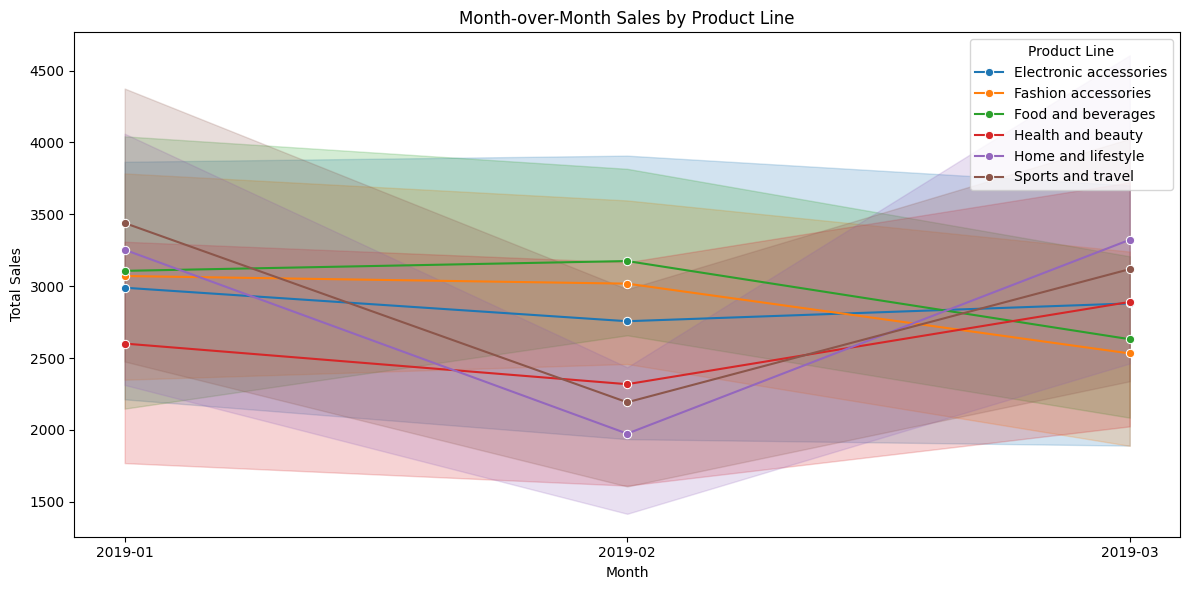

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#check data types
print(monthly_sales.dtypes)

# Converting YearMonth to string if it’s not in a suitable format
if monthly_sales['YearMonth'].dtype != 'O':  # 'O' means object (string)
    monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plotting code
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', hue='Product line', marker='o')
plt.title('Month-over-Month Sales by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()


**Sales by Gender (Month-over-Month)**

->This visualization will highlight if there are notable differences in purchasing behavior between genders.

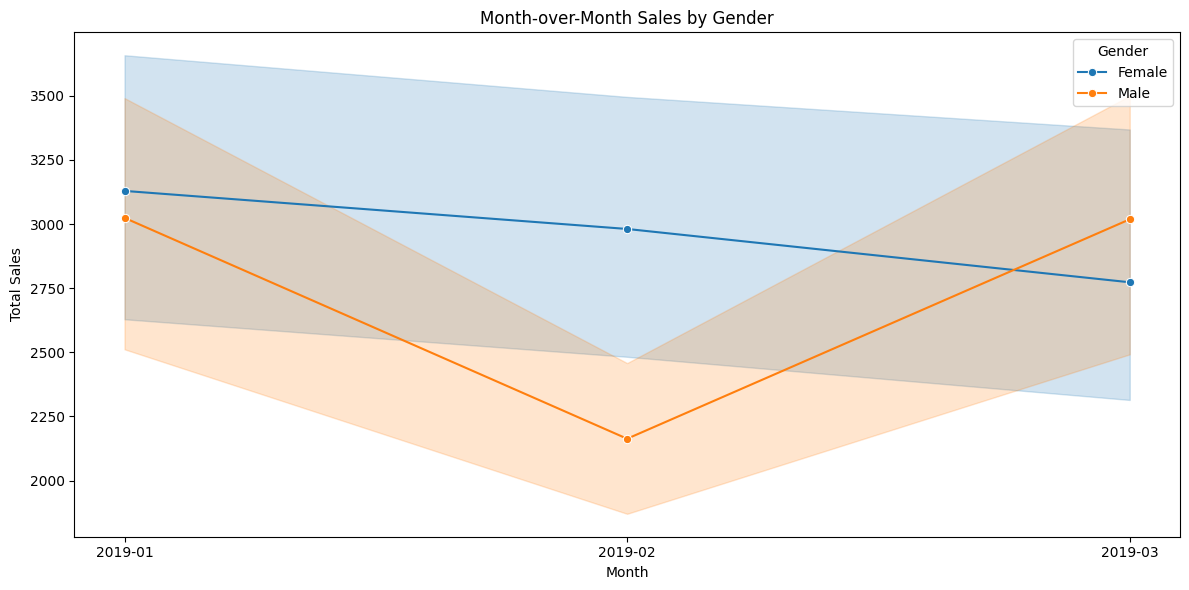

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', hue='Gender', marker='o')
plt.title('Month-over-Month Sales by Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


**Sales by Payment Method (Month-over-Month)**

We can find out that the popularity of different payment methods over time can help identify if there is an opportunity to promote certain methods (e.g., offering discounts for using a specific payment method).

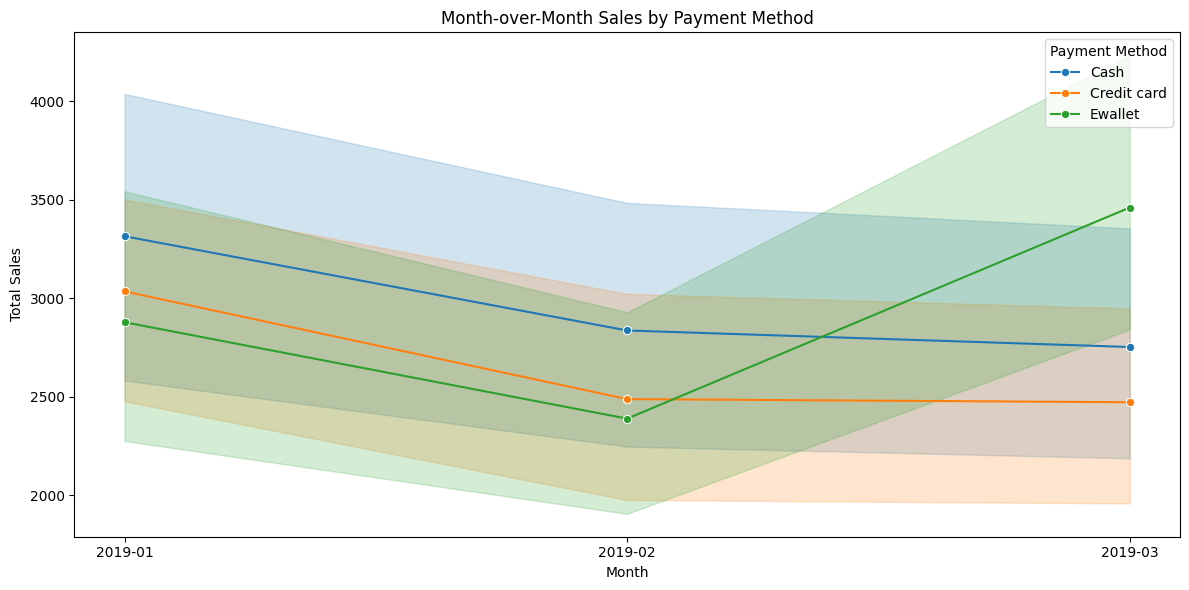

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', hue='Payment', marker='o')
plt.title('Month-over-Month Sales by Payment Method')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()


**These visualizations will give us insights on how to better target sales strategies in April 2019.**